In [3]:
#import numpy, pandas
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import scipy.stats
import statistics
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import style
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
#Read Data CSV
data_csv=pd.read_csv('insurance.csv')
data_csv

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Step #1 Descriptive Statics

Mean: 39.20702541106129
Median: 39.0


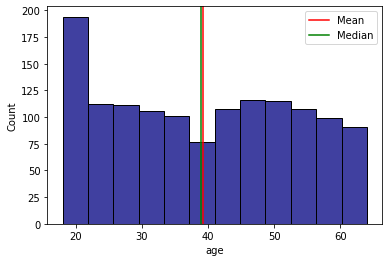

In [5]:
#1. Mean and Median from Age
mean_age = data_csv['age'].mean()
median_age = data_csv['age'].median()
print("Mean:", mean_age)
print("Median:", median_age)
print("========================")
sns.histplot(data=data_csv, x="age", stat="count", color="navy")
plt.axvline(x=data_csv['age'].mean(),color='red')
plt.axvline(x=data_csv['age'].median(),color='green')
plt.legend(['Mean','Median'])
plt.show()

Mean: 13270.422265141257
Median: 9382.033


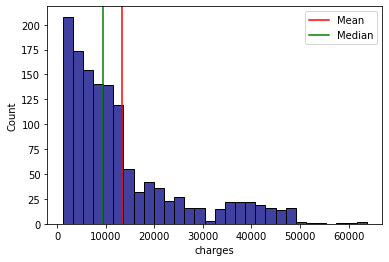

In [6]:
#2. Mean and Median from Charges
mean_charges = data_csv['charges'].mean()
median_charges = data_csv['charges'].median()
print("Mean:", mean_charges)
print("Median:", median_charges)
print("========================")
sns.histplot(data=data_csv, x="charges", stat="count", color="navy")
plt.axvline(x=data_csv['charges'].mean(),color='red')
plt.axvline(x=data_csv['charges'].median(),color='green')
plt.legend(['Mean','Median'])
plt.show()

BMI Smoker: 30.70844890510949
BMI Non Smoker: 30.651795112781954


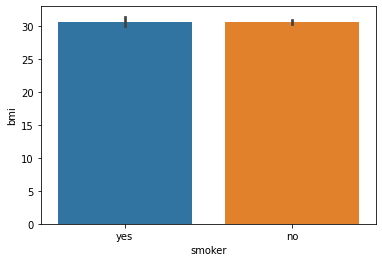

In [7]:
#3. Mean of BMI Smoker and BMI Non Smoker
bmi_smoker = data_csv[data_csv.smoker == 'yes']['bmi'].mean()
bmi_nonsmoker = data_csv[data_csv.smoker == 'no']['bmi'].mean()
print("BMI Smoker:", bmi_smoker)
print("BMI Non Smoker:", bmi_nonsmoker)
print("========================")
sns.barplot(data=data_csv, x = "smoker", y = "bmi")
plt.show()

BMI Female: 30.37774924471299
BMI Male: 30.943128698224854


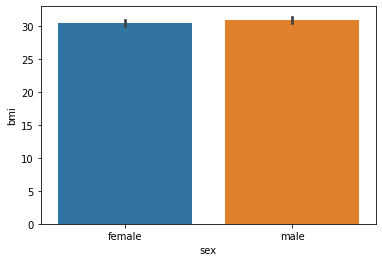

In [9]:
#4. Mean of BMI Female and BMI Male
bmi_female = data_csv[data_csv.sex == 'female']['bmi'].mean()
bmi_male = data_csv[data_csv.sex == 'male']['bmi'].mean()
print("BMI Female:", bmi_female)
print("BMI Male:", bmi_male)
print("========================")
sns.barplot(data=data_csv, x = "sex", y = "bmi")
plt.show()

Age Smoker: 38.51459854014598
Age Non Smoker: 39.38533834586466


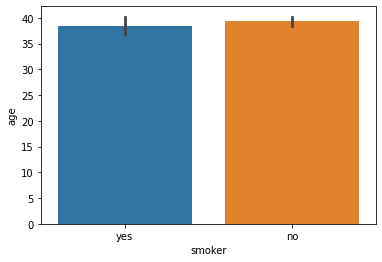

In [10]:
#5. Mean of Age Smoker and Age Non Smoker
age_smoker = data_csv[data_csv.smoker == 'yes']['age'].mean()
age_nonsmoker = data_csv[data_csv.smoker == 'no']['age'].mean()
print("Age Smoker:", age_smoker)
print("Age Non Smoker:", age_nonsmoker)
print("========================")
sns.barplot(data=data_csv, x = "smoker", y = "age")
plt.show()

Age Female: 39.503021148036254
Age Male: 38.917159763313606


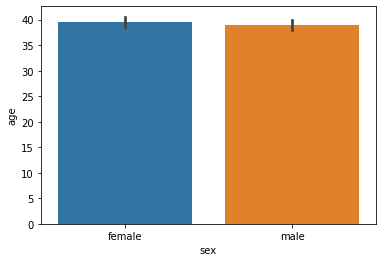

In [11]:
#6. Mean of Age Female and Age Male
age_female = data_csv[data_csv.sex == 'female']['age'].mean()
age_male = data_csv[data_csv.sex == 'male']['age'].mean()
print("Age Female:", age_female)
print("Age Male:", age_male)
print("========================")
sns.barplot(data=data_csv, x = "sex", y = "age")
plt.show()

Age Female Smoker: 38.608695652173914
Age Male Smoker: 38.44654088050314
Age Female Non Smoker: 39.691042047531994
Age Male Non Smoker: 39.06189555125725


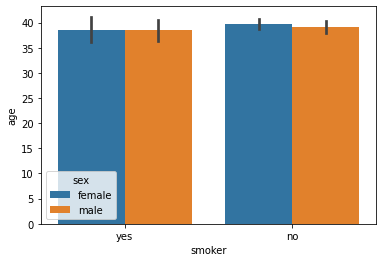

In [12]:
#7. Is the Mean of Age Female & Male Smoker same with the Mean of Age Female and Male Non Smoker?

#Age of Female and Male Smoker
age_female_smoker=data_csv[(data_csv.smoker == 'yes')&(data_csv.sex=='female')]['age'].mean()
age_male_smoker=data_csv[(data_csv.smoker == 'yes')&(data_csv.sex=='male')]['age'].mean()
print("Age Female Smoker:", age_female_smoker)
print("Age Male Smoker:" , age_male_smoker)

#Age of Female and Male Non Smoker
age_female_nonsmoker=data_csv[(data_csv.smoker == 'no')&(data_csv.sex=='female')]['age'].mean()
age_male_nonsmoker=data_csv[(data_csv.smoker == 'no')&(data_csv.sex=='male')]['age'].mean()
print("Age Female Non Smoker:", age_female_nonsmoker)
print("Age Male Non Smoker:" , age_male_nonsmoker)

print("========================")
sns.barplot(data=data_csv, x = "smoker", y = "age", hue = "sex")
plt.show()

Charges for Smoker:  32050.23183153284
Charges for Non Smoker:  8434.268297856204


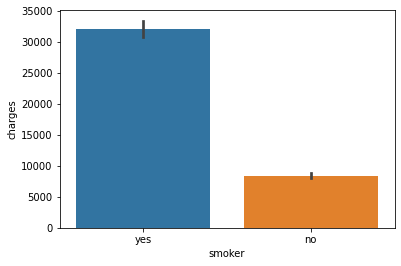

In [13]:
#8. Which one is higher, the Mean of Smoker Charges or Non Smoker Charges?

charges_smoker=data_csv[data_csv.smoker =='yes']['charges'].mean()
charges_nonsmoker=data_csv[data_csv.smoker =='no']['charges'].mean()
print("Charges for Smoker: ", charges_smoker)
print("Charges for Non Smoker: ", charges_nonsmoker)

print("========================")
sns.barplot(data=data_csv, x = "smoker", y = "charges")
plt.show()

Charges for Female Smoker: 30678.996276260867
Charges for Male Smoker: 33042.00597528303
Charges for Female Non Smoker: 8762.297299541133
Charges for Male Non Smoker: 8087.204731276595


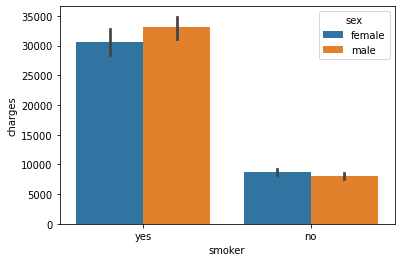

In [14]:
#9. Which one is higher, the Mean of Female and MaleSmoker Charges or Female and Male Non Smoker Charges?

# Female and Male Charges Smoker
charges_female_smoker=data_csv[(data_csv.smoker == 'yes')&(data_csv.sex=='female')]['charges'].mean()
charges_male_smoker=data_csv[(data_csv.smoker == 'yes')&(data_csv.sex=='male')]['charges'].mean()
print("Charges for Female Smoker:", charges_female_smoker)
print("Charges for Male Smoker:" , charges_male_smoker)

# Female and Male Charges Non Smoker
charges_female_nonsmoker=data_csv[(data_csv.smoker == 'no')&(data_csv.sex=='female')]['charges'].mean()
charges_male_nonsmoker=data_csv[(data_csv.smoker == 'no')&(data_csv.sex=='male')]['charges'].mean()
print("Charges for Female Non Smoker:", charges_female_nonsmoker)
print("Charges for Male Non Smoker:" , charges_male_nonsmoker)

print("========================")
sns.barplot(data=data_csv, x = "smoker", y = "charges", hue = "sex")
plt.show()

Step #2 Analisys Variabel Kategorik (PMF)

Charges for Female:  12569.578843835347
Charges for Male:  13956.751177721893


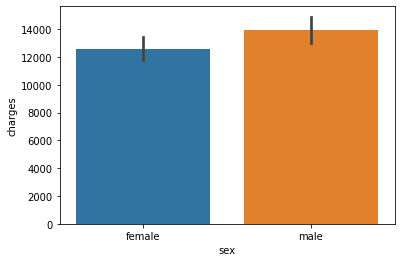

Female Smoker:  115
Male Smoker:  159


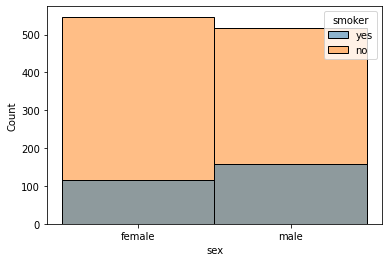

In [15]:
#1. Which Gender who has higher chages?

charges_female=data_csv[data_csv.sex =='female']['charges'].mean()
charges_male=data_csv[data_csv.sex =='male']['charges'].mean()
print("Charges for Female: ", charges_female)
print("Charges for Male: ", charges_male)
print("========================")
sns.barplot(data=data_csv, x = "sex", y = "charges")
plt.show()

print("========================")
female_smoker=data_csv[(data_csv.smoker == 'yes')&(data_csv.sex=='female')]['smoker'].count()
male_smoker=data_csv[(data_csv.smoker == 'yes')&(data_csv.sex=='male')]['smoker'].count()
print("Female Smoker: ", female_smoker)
print("Male Smoker: ", male_smoker)
print("========================")
sns.histplot(data=data_csv, x="sex", hue = "smoker", stat="count")
plt.show()

Southwest:  325
Southeast:  364
Northwest:  325
Northeast:  324
Total all region: 1338
Proportion of Southwest:  0.2428998505231689
Proportion of Southeast:  0.27204783258594917
Proportion of Northwest:  0.2428998505231689
Proportion of Northeast:  0.242152466367713


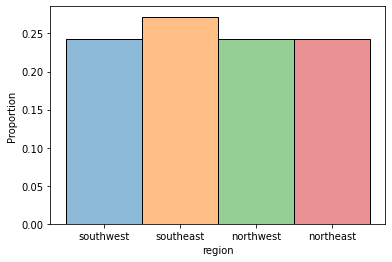

In [16]:
#2. Is every region has same people proportion?

#Southwest
SW=data_csv[data_csv.region =='southwest']['region'].count()
print("Southwest: ", SW)
#Southeast
SE=data_csv[data_csv.region =='southeast']['region'].count()
print("Southeast: ", SE)
#Northwest
NW=data_csv[data_csv.region =='northwest']['region'].count()
print("Northwest: ", NW)
#Northeast
NE=data_csv[data_csv.region =='northeast']['region'].count()
print("Northeast: ", NE)
print("========================")

#Total
SUM=NE+NW+SE+SW
print("Total all region:", SUM)
print("========================")

#Proportion SW
prop_SW=SW/SUM
print("Proportion of Southwest: ", prop_SW)
#Proportion SE
prop_SE=SE/SUM
print("Proportion of Southeast: ", prop_SE)
#Proportio NW
prop_NW=NW/SUM
print("Proportion of Northwest: ", prop_NW)
#Proportio NE
prop_NE=NE/SUM
print("Proportion of Northeast: ", prop_NE)
print("========================")

sns.histplot(data=data_csv, x="region", hue = "region", stat= "proportion", legend= None)
plt.show()

Smoker:  274
Non Smoker: 1064
Proportion of Smoker: 0.20478325859491778
Proportion of Non Smoker: 0.7952167414050823


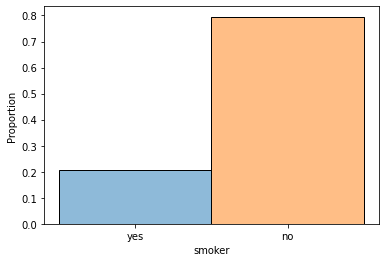

In [17]:
#3. Which one is has higher proportion? Smoker or Non Smoker?

#Total Smoker
smoker=data_csv[data_csv.smoker =='yes']['smoker'].count()
print("Smoker: ", smoker)

#Total Non Smoker
nonsmoker=data_csv[data_csv.smoker =='no']['smoker'].count()
print("Non Smoker:", nonsmoker)

#Proportion of Smoker
prop_smoker=smoker/(smoker+nonsmoker)
print("Proportion of Smoker:", prop_smoker)

#Proportion of Non Smoker
prop_nonsmoker=nonsmoker/(smoker+nonsmoker)
print("Proportion of Non Smoker:", prop_nonsmoker)
print("========================")

sns.histplot(data=data_csv, x="smoker", hue = "smoker", stat= "proportion", legend= None)
plt.show()

Total Sample (Smoke and Non Smoke):  1338
Smoker:  274
Probability Smoker:  0.20478325859491778


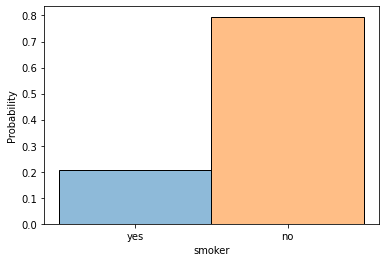

Total Sample (Smoke and Non Smoke):  1338
Female Smoker:  115
Probability Female Smoker:  0.08594917787742899
Probability Female Smoker:  0.08594917787742899
Probability Smoker:  0.20478325859491778
Probability Female Smoker If Smoke:  0.4197080291970803


In [18]:
#4. How much the probability of Female Smoker if known as Smoker?

#Total Sample
sample_space=data_csv['smoker'].count()
print("Total Sample (Smoke and Non Smoke): ", sample_space)

#Total Smoker
smoker=data_csv[data_csv.smoker =='yes']['smoker'].count()
print("Smoker: ", smoker)

#Probability Smoker
prob_smoker=smoker/sample_space
print("Probability Smoker: ", prob_smoker) #probability smoker
sns.histplot(data=data_csv, x="smoker", hue = "smoker", stat= "probability", legend= None)
plt.show()
print("========================")

#Total Sample
sample_space=data_csv['smoker'].count()
print("Total Sample (Smoke and Non Smoke): ", sample_space)

#Female Smoker
female_smoker=data_csv[(data_csv.smoker == 'yes')&(data_csv.sex=='female')]['smoker'].count()
print("Female Smoker: ", female_smoker)

#Probability Female Smoker
prob_female_smoker=female_smoker/sample_space
print("Probability Female Smoker: ", prob_female_smoker) # probability male smoker di smoker nosmoker
print("========================")

#Probability if Female Smoker known as Smoker
print("Probability Female Smoker: ", prob_female_smoker)
print("Probability Smoker: ", prob_smoker)
prob_female_smoker_on_smoker=prob_female_smoker/prob_smoker
print("Probability Female Smoker If Smoke: ", prob_female_smoker_on_smoker)

Total Sample (Smoke and Non Smoke):  1338
Smoker:  274
Probability Smoker:  0.20478325859491778


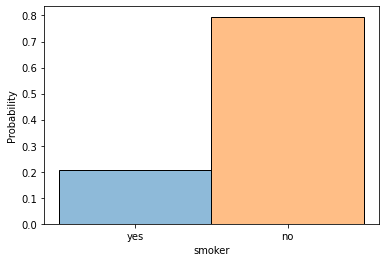

Total Sample (Smoke and Non Smoke):  1338
Male Smoker:  159
Probability Male Smoker:  0.11883408071748879
Probability Male Smoker:  0.11883408071748879
Probability Smoker:  0.20478325859491778
Probability Male Smoker If Smoke:  0.5802919708029197


In [ ]:
#5. How much the probability of Male Smoker if known as Smoker?

#Total Sample
sample_space=data_csv['smoker'].count()
print("Total Sample (Smoke and Non Smoke): ", sample_space)

#Total Smoker
smoker=data_csv[data_csv.smoker =='yes']['smoker'].count()
print("Smoker: ", smoker)

#Probability Smoker
prob_smoker=smoker/sample_space
print("Probability Smoker: ", prob_smoker) #probability smoker
sns.histplot(data=data_csv, x="smoker", hue = "smoker", stat= "probability", legend= None)
plt.show()
print("========================")

#Total Sample
sample_space=data_csv['smoker'].count()
print("Total Sample (Smoke and Non Smoke): ", sample_space)

#Male Smoker
male_smoker=data_csv[(data_csv.smoker == 'yes')&(data_csv.sex=='male')]['smoker'].count()
print("Male Smoker: ", male_smoker)

#Probability Male Smoker
prob_male_smoker=male_smoker/sample_space
print("Probability Male Smoker: ", prob_male_smoker) # probability male smoker di smoker nosmoker
print("========================")

#Probability if Male Smoker known as Smoker
print("Probability Male Smoker: ", prob_male_smoker)
print("Probability Smoker: ", prob_smoker)
prob_male_smoker_on_smoker=prob_male_smoker/prob_smoker
print("Probability Male Smoker If Smoke: ", prob_male_smoker_on_smoker)


Step #3 Analisys Variabel Kontinu (CDF)

In [19]:
#1. Which one is might be more happen??
#a. Someone with BMI >25 and charges >$16700
#b. Someone with BMI <25 and charges >$16700

#Charges >$16700 and BMI >25
charges=data_csv[(data_csv.charges >16700)&(data_csv.bmi >25)]['charges'].count()
print(f"Charges >$16700 and BMI >25 is {charges}")

#Charges >$16700
charges_up=data_csv[(data_csv.charges >16700)]['charges'].count()
print(f"Charges >$16700 is {charges_up}")

#Probability of BM1 >25 and charges >$16700
P1=charges/charges_up
print(f"Probability of someone who has BMI >25 and charges >$16700 is {P1}")

#Probability of BM1 <25 and charges >$16700
P2=1-P1
print(f"Probability of someone who has BMI <25 and charges >$16700 is {P2}")

Charges >$16700 and BMI >25 is 283
Charges >$16700 is 334
Probability of someone who has BMI >25 and charges >$16700 is 0.8473053892215568
Probability of someone who has BMI <25 and charges >$16700 is 0.15269461077844315


In [20]:
#2. Which one is might be more happen??
#a. Smoker with BMI >25 and get charges >$16700
#b. Non Smoker with BMI <25 and get charges >$16700

#Smoker with BMI >25 and charges >$16700
smoker_charges=data_csv[(data_csv.charges >16700)&(data_csv.bmi >25)&(data_csv.smoker == 'yes')]['charges'].count()
print(f"Smoker with charges >$16700 and BMI >25 is {smoker_charges} ")

#Non Smoker with BMI >25 and charges >$16700
nonsmoker_charges=data_csv[(data_csv.charges >16700)&(data_csv.bmi >25)]['charges'].count()
print(f"Non Smoker with charges >$16700 and BMI >25 is {nonsmoker_charges} ")

#Probability of Smoker with BMI >25 and charges >$16700
P1=smoker_charges/nonsmoker_charges
print(f"Probability of Smoker with BMI >25 and charges >$16700 is {P1}")

#Probability of Non Smoker with BMI >25 and charges >$16700
P2=1-P1
print(f"Probability of Non Smoker with BMI >25 and charges >$16700 is {P2}")

Smoker with charges >$16700 and BMI >25 is 215 
Non Smoker with charges >$16700 and BMI >25 is 283 
Probability of Smoker with BMI >25 and charges >$16700 is 0.7597173144876325
Probability of Non Smoker with BMI >25 and charges >$16700 is 0.24028268551236753


Step #4 Analisys Korelasi Variabel

In [21]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr
 
# Read Data CSV
df = pd.read_csv("insurance.csv")
 
# Convert dataframe into series
list1 = df['charges']
list2 = df['bmi']
 
# Apply the pearsonr()
corr= pearsonr(list1, list2)
print(df.corr())
print(f"Pearsons correlation is: {corr}")

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000
Pearsons correlation is: (0.1983409688336288, 2.459085535117846e-13)


Step #5 Hipotesys Test

1. Charges of Smoker is higher than Charges of Non Smoker?

In [22]:
#Kode F-Test
def f_test(group1, group2):
    f = group1.var(ddof=1)/group2.var(ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value

In [23]:
#New DataFrame for Smoker and Non Smoker

#Data Smoker
Smokers=data_csv[data_csv.smoker == 'yes']['charges']
#Convert to Numpy
Smokers=Smokers.to_numpy()

#Data Non Smoker
NonSmokers=data_csv[data_csv.smoker == 'no']['charges']
#Convert to Numpy
NonSmokers=NonSmokers.to_numpy()

In [24]:
#F-Test
print("F-Test Smokers and Non Smokers: ", f_test(Smokers,NonSmokers))
print("\n")
print("From the result of F-TEST, value of F is 3.71 with P close to 0, so H0 is rejected because P value is less than 0.05.")

F-Test Smokers and Non Smokers:  (3.707884538770158, 1.1102230246251565e-16)


From the result of F-TEST, value of F is 3.71 with P close to 0, so H0 is rejected because P value is less than 0.05.


In [25]:
#T-Test
Ttest=scipy.stats.ttest_ind(Smokers,NonSmokers, equal_var=False)
print(Ttest)
print("\n")
print("From the result of T-TEST, value of T is 32.75 with P close to 0, so H0 is rejected because P value is less than 0.05.")

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)


From the result of T-TEST, value of T is 32.75 with P close to 0, so H0 is rejected because P value is less than 0.05.


2. Charges of BMI >25 is higher then Charges of BMI <25?

In [26]:
#New DataFRame for BMI >25 and BMI <25

#Data BMI >25
BMIhigh=data_csv[data_csv.bmi >25]['charges']
#Convert to Numpy
BMIhigh=BMIhigh.to_numpy()

#Data BMI<25
BMIlow=data_csv[data_csv.bmi <25]['charges']
#Convert to Numpy
BMIlow=BMIlow.to_numpy()

In [27]:
#F-Test
print("F-Test BMI>25 and BMI<25: ", f_test(BMIhigh,BMIlow))
print("\n")
print("From the result of F-TEST, value of F is 2.91 with P close to 0, so H0 is rejected because P value is less than 0.05.")

F-Test BMI>25 and BMI<25:  (2.912603553599597, 1.1102230246251565e-16)


From the result of F-TEST, value of F is 2.91 with P close to 0, so H0 is rejected because P value is less than 0.05.


In [28]:
#T-Test
Ttest=scipy.stats.ttest_ind(BMIhigh,BMIlow, equal_var=False)
print(Ttest)
print("\n")
print("From the result of T-TEST, value of T is 5.93 with P close to 0, so H0 is rejected because P value is less than 0.05.")

Ttest_indResult(statistic=5.929878344096734, pvalue=5.080897303161378e-09)


From the result of T-TEST, value of T is 5.93 with P close to 0, so H0 is rejected because P value is less than 0.05.


3. Male Charges is higher then Female Charges?

In [29]:
#New DataFRame for Male and Female

#Data Male
Male=data_csv[data_csv.sex == 'male']['charges']
#Convert to Numpy
Male=Male.to_numpy()

#Data Female
Female=data_csv[data_csv.sex == 'female']['charges']
#Convert to Numpy
Female=Female.to_numpy()

In [ ]:
#F-Test
print("F-Test Male and Female: ", f_test(Male,Female))
print("\n")
print("From the result of F-TEST, value of F is 1.36 with P close to 0, so H0 is rejected because P value is less than 0.05.")

F-Test Male and Female:  (1.3584995130182387, 3.947797030812161e-05)


From the result of F-TEST, value of F is 1.36 with P close to 0, so H0 is rejected because P value is less than 0.05.


In [ ]:
#T-Test
Ttest=scipy.stats.ttest_ind(Male,Female, equal_var=False)
print(Ttest)
print("\n")
print("From the result of T-TEST, value of T is 2.1 with P value is 0.036, so H0 is rejected because P value is less than 0.05.")

Ttest_indResult(statistic=2.1008878232359565, pvalue=0.035841014956016645)


From the result of T-TEST, value of T is 2.1 with P value is 0.036, so H0 is rejected because P value is less than 0.05.
